In [46]:
ECFP_PATH = '../results/smiles/latent_vectors_20241219_092302/preds_20241222-123507/predictions.csv'
KRFP_PATH = '../results/smiles/latent_vectors_20241218_114927/preds_20241222-114212/predictions.csv'

import pandas as pd
df_ECFP = pd.read_csv(ECFP_PATH)
df_KRFP = pd.read_csv(KRFP_PATH)

# calculate validity
total_sampled = 50000
valid_ECFP = len(df_ECFP)/total_sampled
valid_KRFP = len(df_KRFP)/total_sampled

print(f'ECFP: {valid_ECFP:.2%}')
print(f'KRFP: {valid_KRFP:.2%}')

ECFP: 3.88%
KRFP: 2.92%


# KRFP vs ECFP
---

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

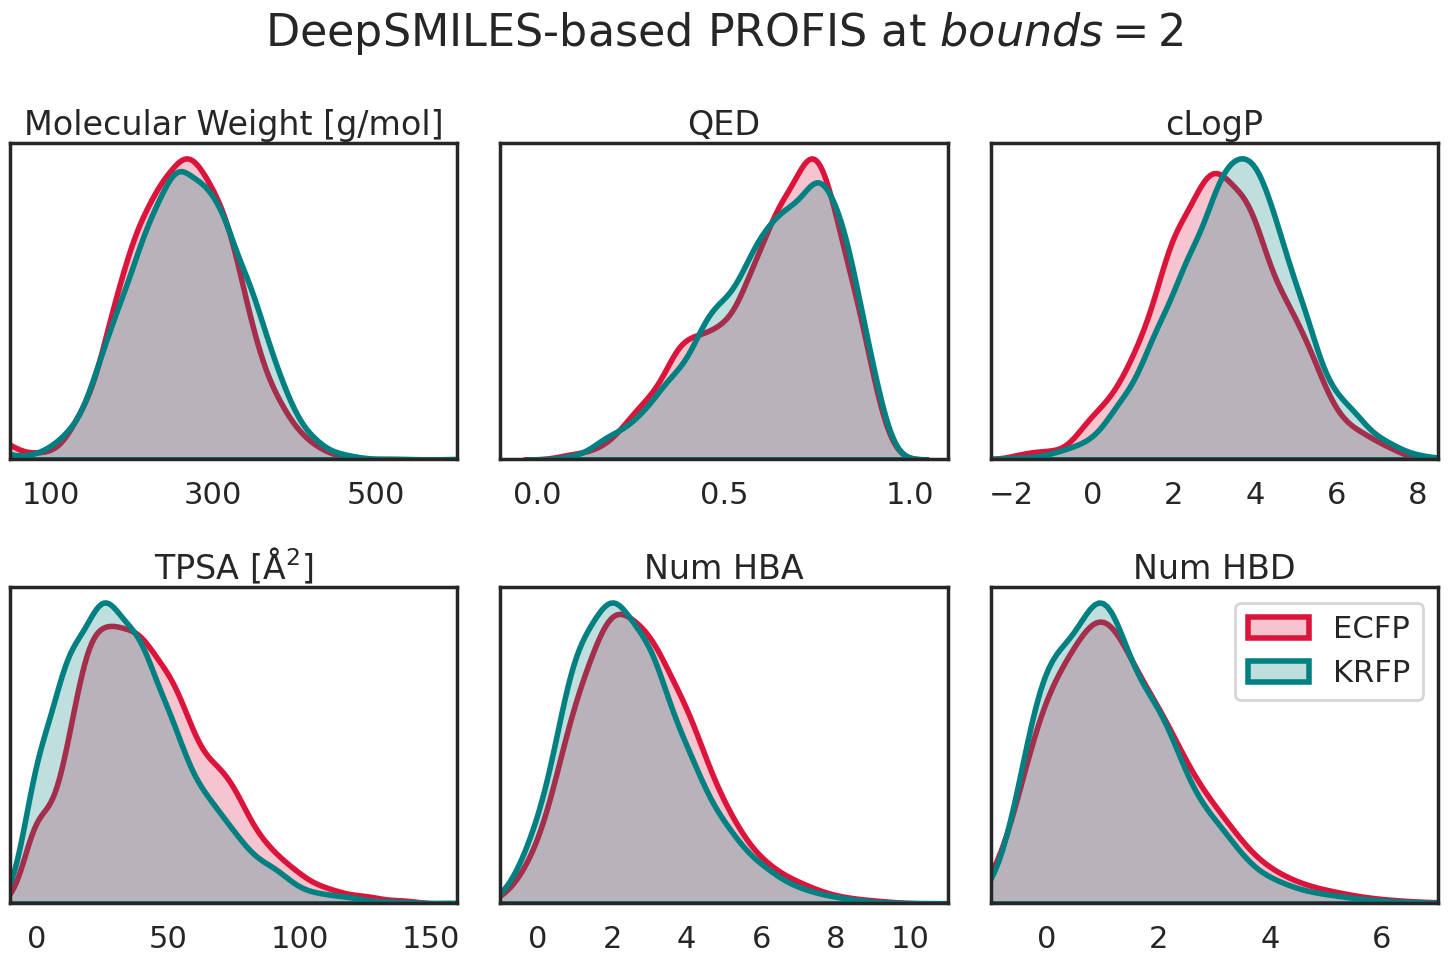

In [40]:
# plot kde of qed, mol_wt, logP, tpsa, num_HBA, num_HBD

COLOR_ECFP = 'crimson'
COLOR_KRFP = 'teal'

# set linewidth for kde plot
lw = 4

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(r'DeepSMILES-based PROFIS at $bounds = 2$', fontsize=32)


sns.kdeplot(df_ECFP['mol_wt'], ax=axes[0, 0], color=COLOR_ECFP, fill=True, linewidths=lw)
sns.kdeplot(df_KRFP['mol_wt'], ax=axes[0, 0], color=COLOR_KRFP, fill=True, linewidths=lw)
axes[0, 0].set_title('Molecular Weight [g/mol]')
axes[0, 0].set_xlim(50, 600)
axes[0, 0].set_xticks(range(100, 610, 200))

sns.kdeplot(df_ECFP['qed'], ax=axes[0, 1], color=COLOR_ECFP, fill=True, common_norm=True, linewidths=lw)
sns.kdeplot(df_KRFP['qed'], ax=axes[0, 1], color=COLOR_KRFP, fill=True, common_norm=True, linewidths=lw)
axes[0, 1].set_title('QED')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].set_xticks([0, 0.5, 1])

sns.kdeplot(df_ECFP['logP'], ax=axes[0, 2], color=COLOR_ECFP, fill=True, linewidths=lw)
sns.kdeplot(df_KRFP['logP'], ax=axes[0, 2], color=COLOR_KRFP, fill=True, linewidths=lw)
axes[0, 2].set_title('cLogP')
axes[0, 2].set_xlim(-2.5, 8.5)
axes[0, 2].set_xticks(range(-2, 9, 2))

sns.kdeplot(df_ECFP['tpsa'], ax=axes[1, 0], color=COLOR_ECFP, fill=True, linewidths=lw)
sns.kdeplot(df_KRFP['tpsa'], ax=axes[1, 0], color=COLOR_KRFP, fill=True, linewidths=lw, bw_adjust=1.2)
axes[1, 0].set_title('TPSA [Å$^{2}$]')
axes[1, 0].set_xlim(-10, 160)

sns.kdeplot(df_ECFP['num_HBA'], ax=axes[1, 1], color=COLOR_ECFP, fill=True, bw_adjust=1.8, linewidths=lw)
sns.kdeplot(df_KRFP['num_HBA'], ax=axes[1, 1], color=COLOR_KRFP, fill=True, bw_adjust=1.8, linewidths=lw)
axes[1, 1].set_title('Num HBA')
axes[1, 1].set_xlim(-1, 11)
axes[1, 1].set_xticks(range(0, 11, 2))

sns.kdeplot(df_ECFP['num_HBD'], ax=axes[1, 2], color=COLOR_ECFP, fill=True, bw_adjust=2.2, linewidths=lw)
sns.kdeplot(df_KRFP['num_HBD'], ax=axes[1, 2], color=COLOR_KRFP, fill=True, bw_adjust=2.2, linewidths=lw)
axes[1, 2].set_title('Num HBD')
axes[1, 2].set_xlim(-1, 7)
axes[1, 2].set_xticks(range(0, 7, 2))
# display legend
axes[1, 2].legend(['ECFP', 'KRFP'], loc='upper right')

# hide y-axis labels and ticks
for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

# move the subplots a bit further apart
plt.tight_layout()

plt.savefig('kde_deepsmiles_bounds2.png')

## D2 Ligands Dataset
---

In [21]:
# calculate properties of D2 ligands dataset
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

df = pd.read_parquet('../data/d2_ECFP_100nM.parquet')
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df['mol_wt'] = df['mol'].apply(Descriptors.MolWt)
df['qed'] = df['mol'].apply(Descriptors.qed)
df['logP'] = df['mol'].apply(Descriptors.MolLogP)
df['tpsa'] = df['mol'].apply(Descriptors.TPSA)
df['num_HBA'] = df['mol'].apply(Descriptors.NumHAcceptors)
df['num_HBD'] = df['mol'].apply(Descriptors.NumHDonors)

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

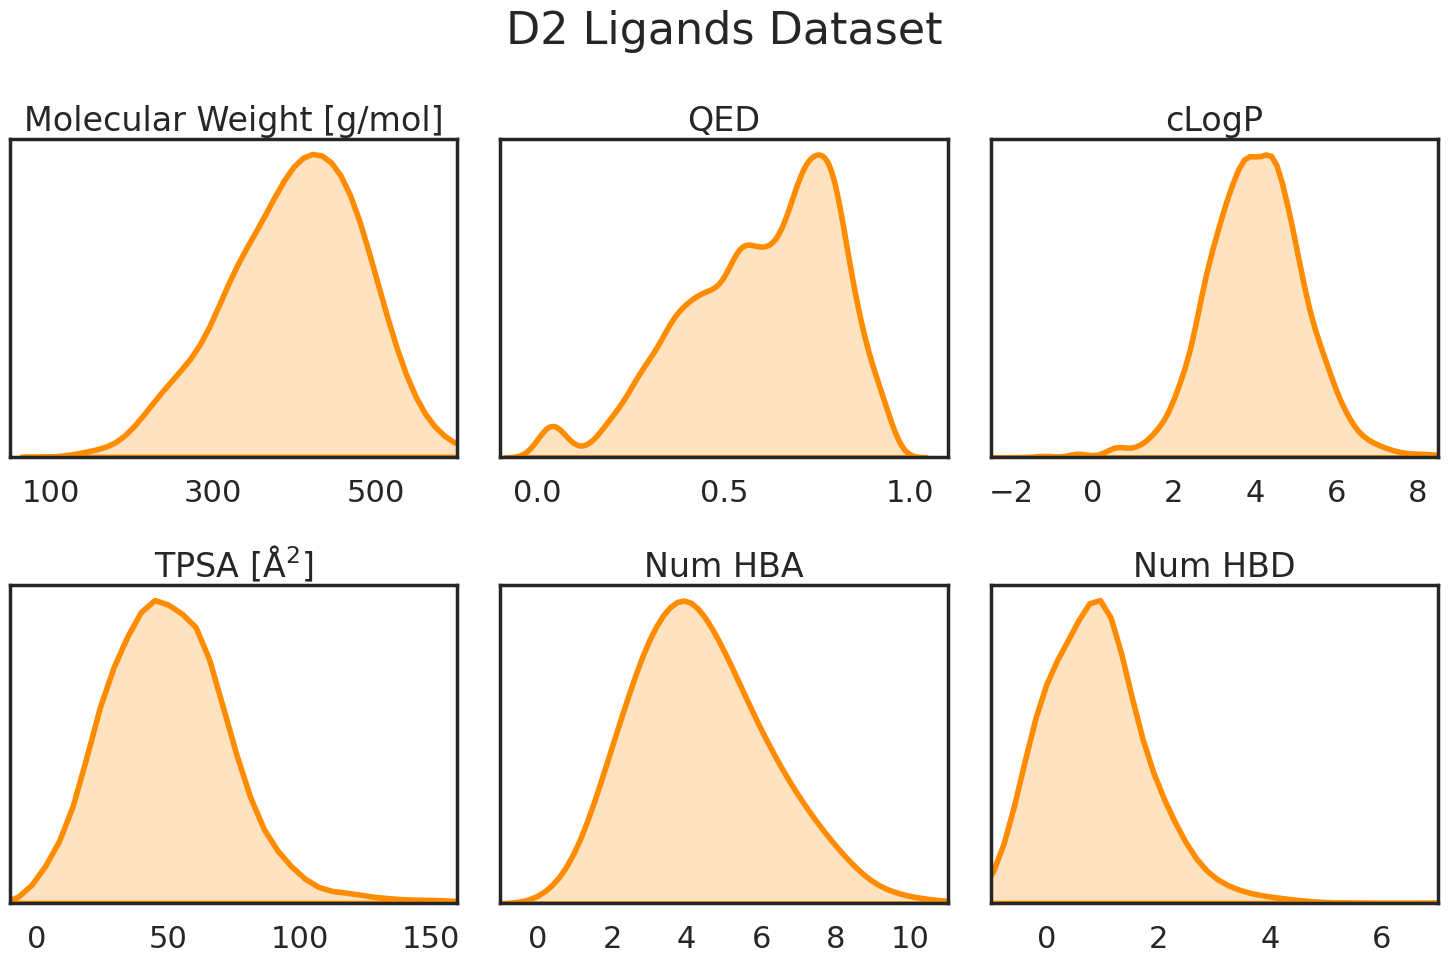

In [25]:
# plot properties of D2 ligands dataset

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(r'D2 Ligands Dataset', fontsize=32)

sns.kdeplot(df['mol_wt'], ax=axes[0, 0], color='darkorange', fill=True, linewidths=4)
axes[0, 0].set_title('Molecular Weight [g/mol]')
axes[0, 0].set_xlim(50, 600)
axes[0, 0].set_xticks(range(100, 610, 200))

sns.kdeplot(df['qed'], ax=axes[0, 1], color='darkorange', fill=True, common_norm=True, linewidths=4)
axes[0, 1].set_title('QED')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].set_xticks([0, 0.5, 1])

sns.kdeplot(df['logP'], ax=axes[0, 2], color='darkorange', fill=True, linewidths=4)
axes[0, 2].set_title('cLogP')
axes[0, 2].set_xlim(-2.5, 8.5)
axes[0, 2].set_xticks(range(-2, 9, 2))

sns.kdeplot(df['tpsa'], ax=axes[1, 0], color='darkorange', fill=True, linewidths=4)
axes[1, 0].set_title('TPSA [Å$^{2}$]')
axes[1, 0].set_xlim(-10, 160)

sns.kdeplot(df['num_HBA'], ax=axes[1, 1], color='darkorange', fill=True, bw_adjust=1.8, linewidths=4)
axes[1, 1].set_title('Num HBA')
axes[1, 1].set_xlim(-1, 11)
axes[1, 1].set_xticks(range(0, 11, 2))

sns.kdeplot(df['num_HBD'], ax=axes[1, 2], color='darkorange', fill=True, bw_adjust=2.0, linewidths=4)
axes[1, 2].set_title('Num HBD')
axes[1, 2].set_xlim(-1, 7)
axes[1, 2].set_xticks(range(0, 7, 2))

# hide y-axis labels and ticks
for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

# move the subplots a bit further apart
plt.tight_layout()

plt.savefig('kde_d2_ligands.png')

# SMILES vs DeepSMILES
---

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

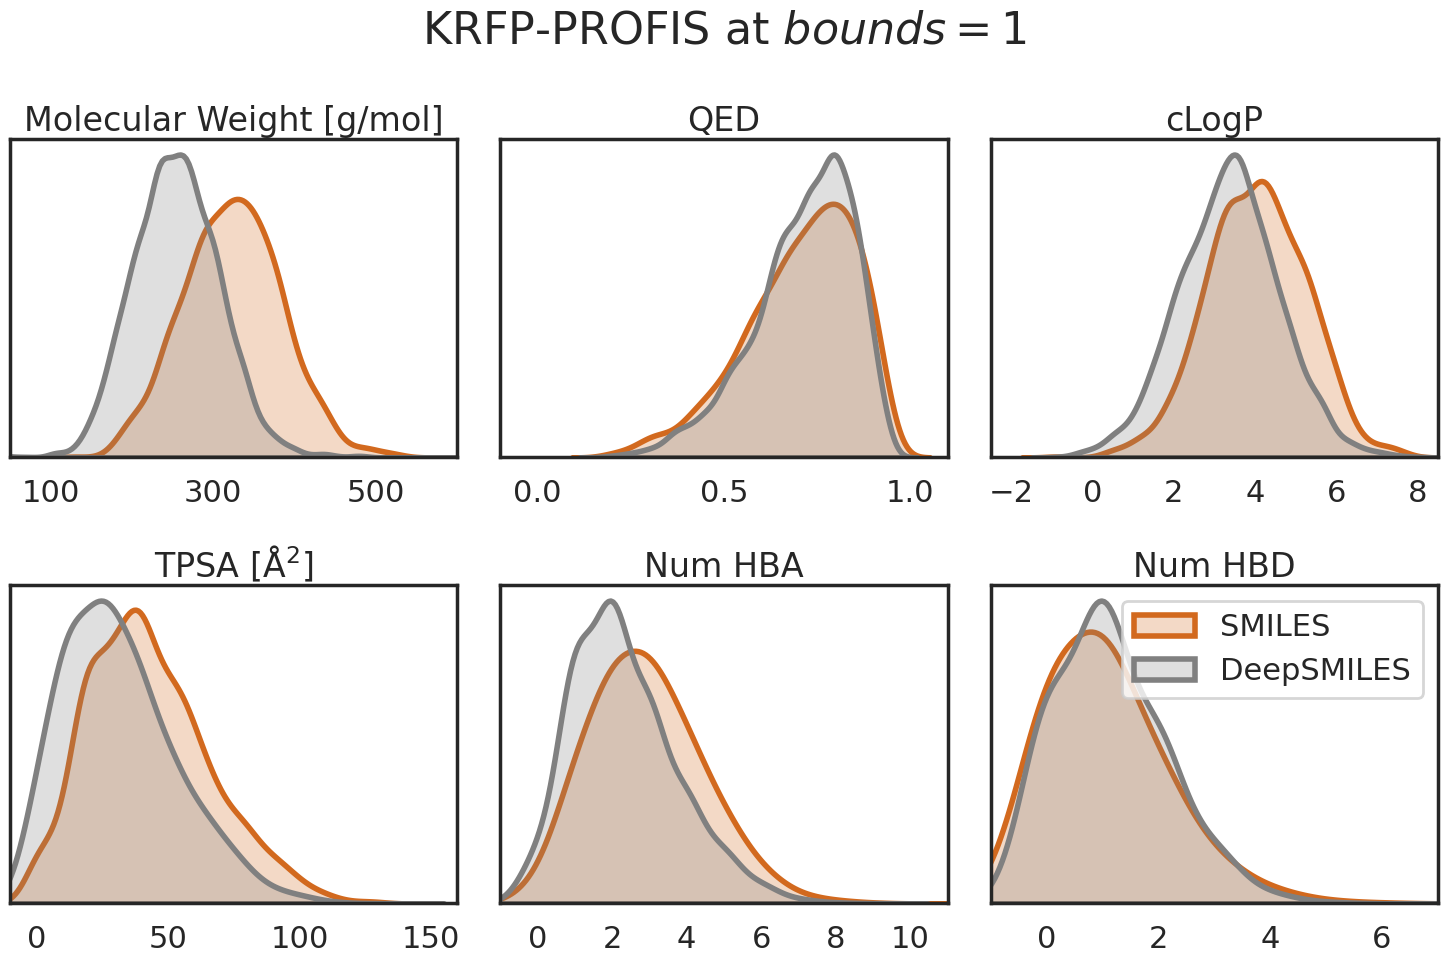

In [55]:
df_SMILES = pd.read_csv('../results/smiles/latent_vectors_20241218_114927/preds_20241222-114212/predictions.csv')

df_DeepSMILES = pd.read_csv(
    '../results/deepsmiles/latent_vectors_20241225_043106/preds_20241226-163544/predictions.csv')

# plot kde of qed, mol_wt, logP, tpsa, num_HBA, num_HBD

COLOR_SMILES = 'chocolate'
COLOR_DeepSMILES = 'grey'

# set linewidth for kde plot
lw = 4

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(r'KRFP-PROFIS at $bounds = 1$', fontsize=32)


sns.kdeplot(df_SMILES['mol_wt'], ax=axes[0, 0], color=COLOR_SMILES, fill=True, linewidths=lw)
sns.kdeplot(df_DeepSMILES['mol_wt'], ax=axes[0, 0], color=COLOR_DeepSMILES, fill=True, linewidths=lw)
axes[0, 0].set_title('Molecular Weight [g/mol]')
axes[0, 0].set_xlim(50, 600)
axes[0, 0].set_xticks(range(100, 610, 200))

sns.kdeplot(df_SMILES['qed'], ax=axes[0, 1], color=COLOR_SMILES, fill=True, common_norm=True, linewidths=lw)
sns.kdeplot(df_DeepSMILES['qed'], ax=axes[0, 1], color=COLOR_DeepSMILES, fill=True, common_norm=True, linewidths=lw)
axes[0, 1].set_title('QED')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].set_xticks([0, 0.5, 1])

sns.kdeplot(df_SMILES['logP'], ax=axes[0, 2], color=COLOR_SMILES, fill=True, linewidths=lw)
sns.kdeplot(df_DeepSMILES['logP'], ax=axes[0, 2], color=COLOR_DeepSMILES, fill=True, linewidths=lw)
axes[0, 2].set_title('cLogP')
axes[0, 2].set_xlim(-2.5, 8.5)
axes[0, 2].set_xticks(range(-2, 9, 2))

sns.kdeplot(df_SMILES['tpsa'], ax=axes[1, 0], color=COLOR_SMILES, fill=True, linewidths=lw)
sns.kdeplot(df_DeepSMILES['tpsa'], ax=axes[1, 0], color=COLOR_DeepSMILES, fill=True, linewidths=lw, bw_adjust=1.8)
axes[1, 0].set_title('TPSA [Å$^{2}$]')
axes[1, 0].set_xlim(-10, 160)

sns.kdeplot(df_SMILES['num_HBA'], ax=axes[1, 1], color=COLOR_SMILES, fill=True, bw_adjust=2, linewidths=lw)
sns.kdeplot(df_DeepSMILES['num_HBA'], ax=axes[1, 1], color=COLOR_DeepSMILES, fill=True, bw_adjust=2, linewidths=lw)
axes[1, 1].set_title('Num HBA')
axes[1, 1].set_xlim(-1, 11)
axes[1, 1].set_xticks(range(0, 11, 2))

sns.kdeplot(df_SMILES['num_HBD'], ax=axes[1, 2], color=COLOR_SMILES, fill=True, bw_adjust=2.5, linewidths=lw)
sns.kdeplot(df_DeepSMILES['num_HBD'], ax=axes[1, 2], color=COLOR_DeepSMILES, fill=True, bw_adjust=2.8, linewidths=lw)
axes[1, 2].set_title('Num HBD')
axes[1, 2].set_xlim(-1, 7)
axes[1, 2].set_xticks(range(0, 7, 2))
# display legend
axes[1, 2].legend(['SMILES', 'DeepSMILES'], loc='upper right')

# hide y-axis labels and ticks
for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

# move the subplots a bit further apart
plt.tight_layout()

plt.savefig('kde_KRFP_smiles_vs_deepsmiles_bounds_1.png')

/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hubert/miniconda3/envs/profis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

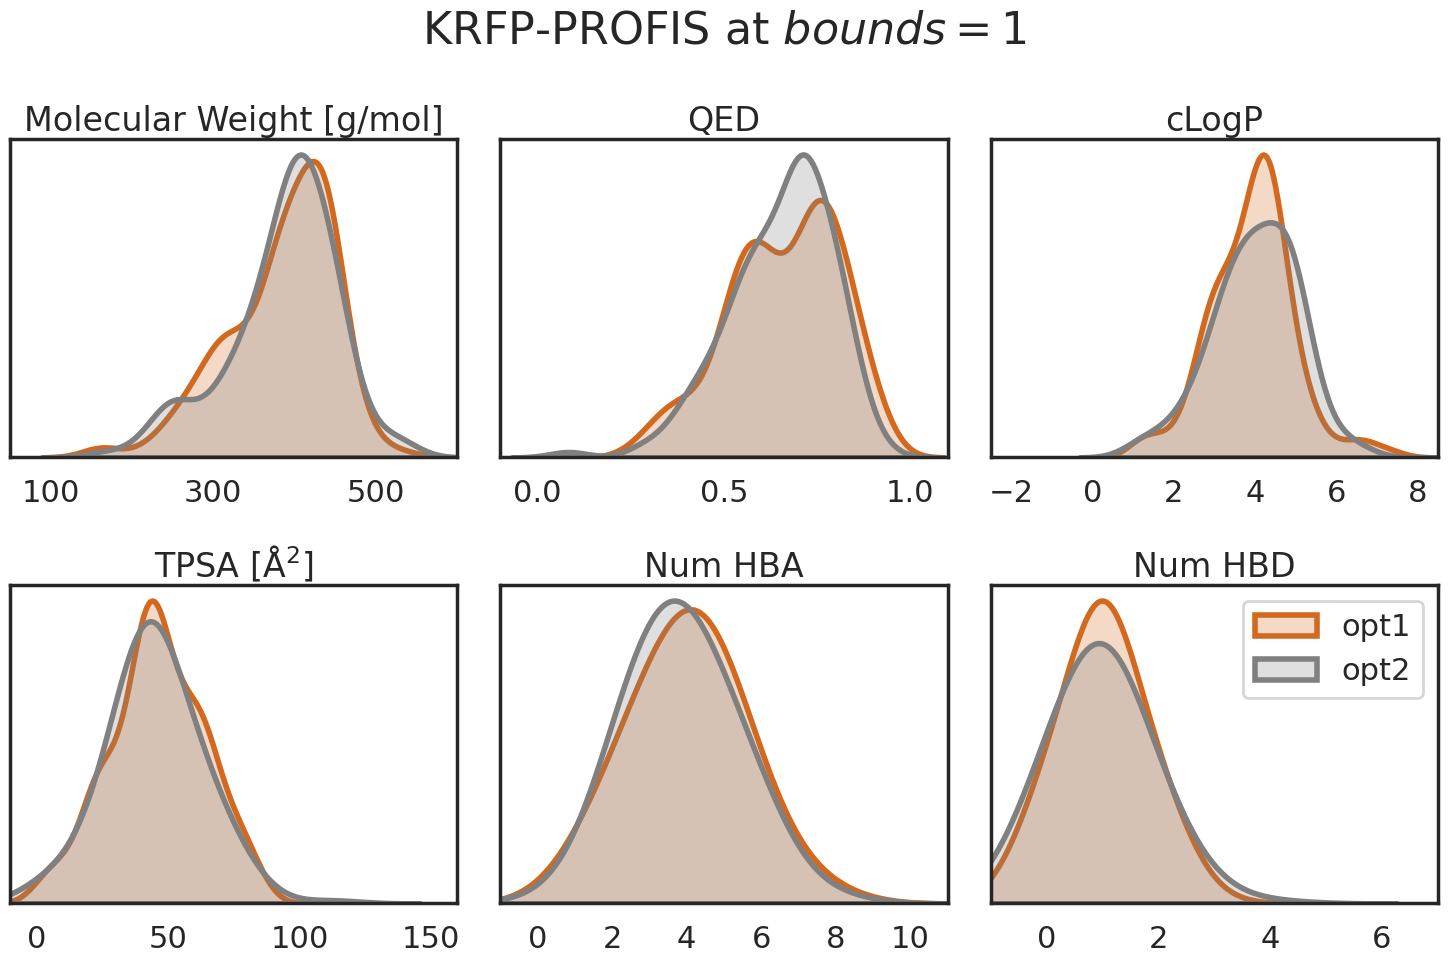

In [1]:
import pandas as pd

df_opt1 = pd.read_csv('../docking/d2_forward_ECFP_SAMPLE_150.smi', sep='\t', header=None).rename(columns={0: 'smiles'})

df_opt2 = pd.read_csv('../docking/d2_forward_KRFP_SAMPLE_150.smi', sep='\t', header=None).rename(columns={0: 'smiles'})

def calc_properties(df):
    # calculate properties of D2 ligands dataset (qed, mol_wt, logP, tpsa, num_HBA, num_HBD)
    from rdkit import Chem
    from rdkit.Chem import Descriptors
    
    df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
    df['mol_wt'] = df['mol'].apply(Descriptors.MolWt)
    df['qed'] = df['mol'].apply(Descriptors.qed)
    df['logP'] = df['mol'].apply(Descriptors.MolLogP)
    df['tpsa'] = df['mol'].apply(Descriptors.TPSA)
    df['num_HBA'] = df['mol'].apply(Descriptors.NumHAcceptors)
    df['num_HBD'] = df['mol'].apply(Descriptors.NumHDonors)
    return df

df_opt1 = calc_properties(df_opt1)
df_opt2 = calc_properties(df_opt2)

# plot kde of qed, mol_wt, logP, tpsa, num_HBA, num_HBD

COLOR_opt1 = 'chocolate'
COLOR_opt2 = 'grey'

# set linewidth for kde plot
lw = 4

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(r'KRFP-PROFIS at $bounds = 1$', fontsize=32)


sns.kdeplot(df_opt1['mol_wt'], ax=axes[0, 0], color=COLOR_opt1, fill=True, linewidths=lw)
sns.kdeplot(df_opt2['mol_wt'], ax=axes[0, 0], color=COLOR_opt2, fill=True, linewidths=lw)
axes[0, 0].set_title('Molecular Weight [g/mol]')
axes[0, 0].set_xlim(50, 600)
axes[0, 0].set_xticks(range(100, 610, 200))

sns.kdeplot(df_opt1['qed'], ax=axes[0, 1], color=COLOR_opt1, fill=True, common_norm=True, linewidths=lw)
sns.kdeplot(df_opt2['qed'], ax=axes[0, 1], color=COLOR_opt2, fill=True, common_norm=True, linewidths=lw)
axes[0, 1].set_title('QED')
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].set_xticks([0, 0.5, 1])

sns.kdeplot(df_opt1['logP'], ax=axes[0, 2], color=COLOR_opt1, fill=True, linewidths=lw)
sns.kdeplot(df_opt2['logP'], ax=axes[0, 2], color=COLOR_opt2, fill=True, linewidths=lw)
axes[0, 2].set_title('cLogP')
axes[0, 2].set_xlim(-2.5, 8.5)
axes[0, 2].set_xticks(range(-2, 9, 2))

sns.kdeplot(df_opt1['tpsa'], ax=axes[1, 0], color=COLOR_opt1, fill=True, linewidths=lw)
sns.kdeplot(df_opt2['tpsa'], ax=axes[1, 0], color=COLOR_opt2, fill=True, linewidths=lw, bw_adjust=1.8)
axes[1, 0].set_title('TPSA [Å$^{2}$]')
axes[1, 0].set_xlim(-10, 160)

sns.kdeplot(df_opt1['num_HBA'], ax=axes[1, 1], color=COLOR_opt1, fill=True, bw_adjust=2, linewidths=lw)
sns.kdeplot(df_opt2['num_HBA'], ax=axes[1, 1], color=COLOR_opt2, fill=True, bw_adjust=2, linewidths=lw)
axes[1, 1].set_title('Num HBA')
axes[1, 1].set_xlim(-1, 11)
axes[1, 1].set_xticks(range(0, 11, 2))

sns.kdeplot(df_opt1['num_HBD'], ax=axes[1, 2], color=COLOR_opt1, fill=True, bw_adjust=2.5, linewidths=lw)
sns.kdeplot(df_opt2['num_HBD'], ax=axes[1, 2], color=COLOR_opt2, fill=True, bw_adjust=2.8, linewidths=lw)
axes[1, 2].set_title('Num HBD')
axes[1, 2].set_xlim(-1, 7)
axes[1, 2].set_xticks(range(0, 7, 2))
# display legend
axes[1, 2].legend(['opt1', 'opt2'], loc='upper right')

# hide y-axis labels and ticks
for ax in axes.flatten():
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')

# move the subplots a bit further apart
plt.tight_layout()

#plt.savefig('kde_KRFP_smiles_vs_deepsmiles_bounds_1.png')